# Pipelines, grid search i text mining
**Descripció**
Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics

### Recursos
Recursos de l'aula i https://www.nltk.org

## Nivell 1
### Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

In [4]:
import nltk

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import f1_score, auc, classification_report, plot_confusion_matrix

from imblearn.combine import SMOTETomek


### Seleccionem un conjunt de dades per a fer una classificació

Ho provem amb el famós [Dataset del Titanic](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv)

In [3]:

titanic_file = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'

dftitanic = pd.read_csv(titanic_file)

In [4]:
dftitanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [5]:
# No considerarem el nom (Name) per fer l'exercici

train_cols = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
target = ['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dftitanic[train_cols], dftitanic[target], 
                                                    test_size=0.15, random_state=42)

In [7]:

cols_num = dftitanic[train_cols].select_dtypes(include=['int','float']).columns.to_list()
cols_cat = dftitanic[train_cols].select_dtypes(include=['object']).columns.to_list()
    

ct = ColumnTransformer(
             transformers=[('num', RobustScaler(), cols_num),
                          ('cat', OneHotEncoder(handle_unknown='ignore'), cols_cat)])

pipe = Pipeline([ ('transf',ct),
                 ('pca', PCA()),
                ('clf', RandomForestClassifier())], )

params = {'pca__n_components': [5, 10, 15],
          'clf__min_samples_leaf': [1,5,10,20],
         'clf__max_depth': [10,15,20],
         'clf__n_estimators': [int(x) for x in range(200,1600,200)]}
# [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
search = GridSearchCV(pipe, param_grid=params, scoring=['f1','roc_auc','accuracy'], cv=3,
                     refit='f1', verbose=1)

In [8]:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [9]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'Siblings/Spouses '
                                                                          'Aboard',
                                                                          'Parents/Children '
                                                                          'Aboard',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneH

In [10]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        83
           1       0.73      0.65      0.69        51

    accuracy                           0.78       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.78      0.77       134



In [11]:
search.best_params_

{'clf__max_depth': 20,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 1200,
 'pca__n_components': 5}

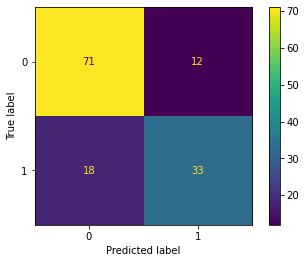

In [12]:
plot_confusion_matrix(search, X_test, y_test)

### Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [5]:
import nltk
from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
file = 'melville-moby_dick.txt'
moby = nltk.corpus.gutenberg.raw(file)

In [7]:
nltk.FreqDist(moby).tabulate(10)

            e      t      a      o      n      s      i      h      r 
198098 115855  85539  75266  68338  64431  62022  61891  61434  51311 


In [8]:
moby_words = nltk.word_tokenize(moby)
moby_sent = nltk.sent_tokenize(moby)

In [9]:
print(nltk.FreqDist(moby_words))

<FreqDist with 20742 samples and 255028 outcomes>


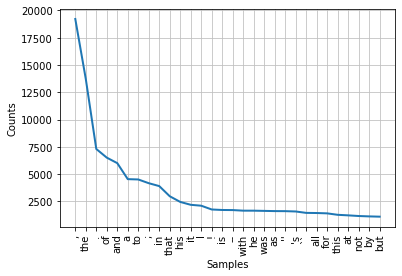

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
nltk.FreqDist(moby_words).plot(30)

## Nivell 2
### Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [11]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
# Eliminem les stop words del texte

moby_words_nostop = [w for w in moby_words if w.lower() not in stop_words]

In [14]:
len(moby_words_nostop), len(moby_words)

(149753, 255028)

In [15]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [16]:
moby_steammed = [ps.stem(w) for w in moby_words_nostop]

In [17]:
len(moby_steammed)

149753

In [18]:
nltk.FreqDist(moby_steammed)

FreqDist({',': 19204, '.': 7306, ';': 4173, '!': 1767, '--': 1713, "'s": 1634, "''": 1615, 'whale': 1468, '``': 1456, '?': 1004, ...})

In [19]:
print(nltk.FreqDist(moby_steammed))

<FreqDist with 12362 samples and 149753 outcomes>


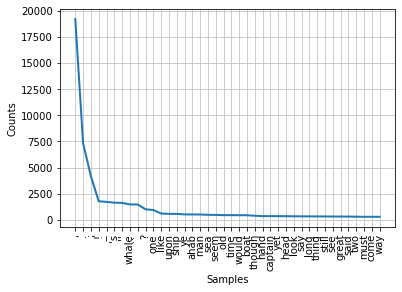

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
nltk.FreqDist(moby_steammed).plot(40)

In [21]:
nltk.corpus.gutenberg.fileids()

file =nltk.corpus.gutenberg.words('carroll-alice.txt')
my_lines_list=[]
for line in file:
    my_lines_list.append(line)
my_lines_list

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 '),',
 'whether',
 'the',
 'plea

In [22]:
nltk.text.Text(my_lines_list)

<Text: Alice ' s Adventures in Wonderland by Lewis Carroll 1865>

## Nivell 3
### Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import re

In [24]:
textos = sent_tokenize("hi, how are you? I'm ok, and you? I'm doing great. My year has been fabulous. My year is fabulous. My day is terrific, though sometimes not good. My day is not good. My day is bad")

print(textos)
sia = SentimentIntensityAnalyzer()

for t in textos:
    print(sia.polarity_scores(t), t)


['hi, how are you?', "I'm ok, and you?", "I'm doing great.", 'My year has been fabulous.', 'My year is fabulous.', 'My day is terrific, though sometimes not good.', 'My day is not good.', 'My day is bad']
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} hi, how are you?
{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296} I'm ok, and you?
{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249} I'm doing great.
{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.5267} My year has been fabulous.
{'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267} My year is fabulous.
{'neg': 0.209, 'neu': 0.521, 'pos': 0.269, 'compound': 0.1764} My day is terrific, though sometimes not good.
{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412} My day is not good.
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423} My day is bad


In [25]:
gutenberg = nltk.corpus.gutenberg.fileids()

In [26]:
def sentiment_analysis(text):
    """Returns the compound of the analysis of the sentences using SentimentIntensityAnalyzer"""
    
    sid = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    
    results = []
    
    for t in sentences:
        results.append(sid.polarity_scores(t)['compound'])
        
    return results

In [27]:
for f in gutenberg:
    print(f)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


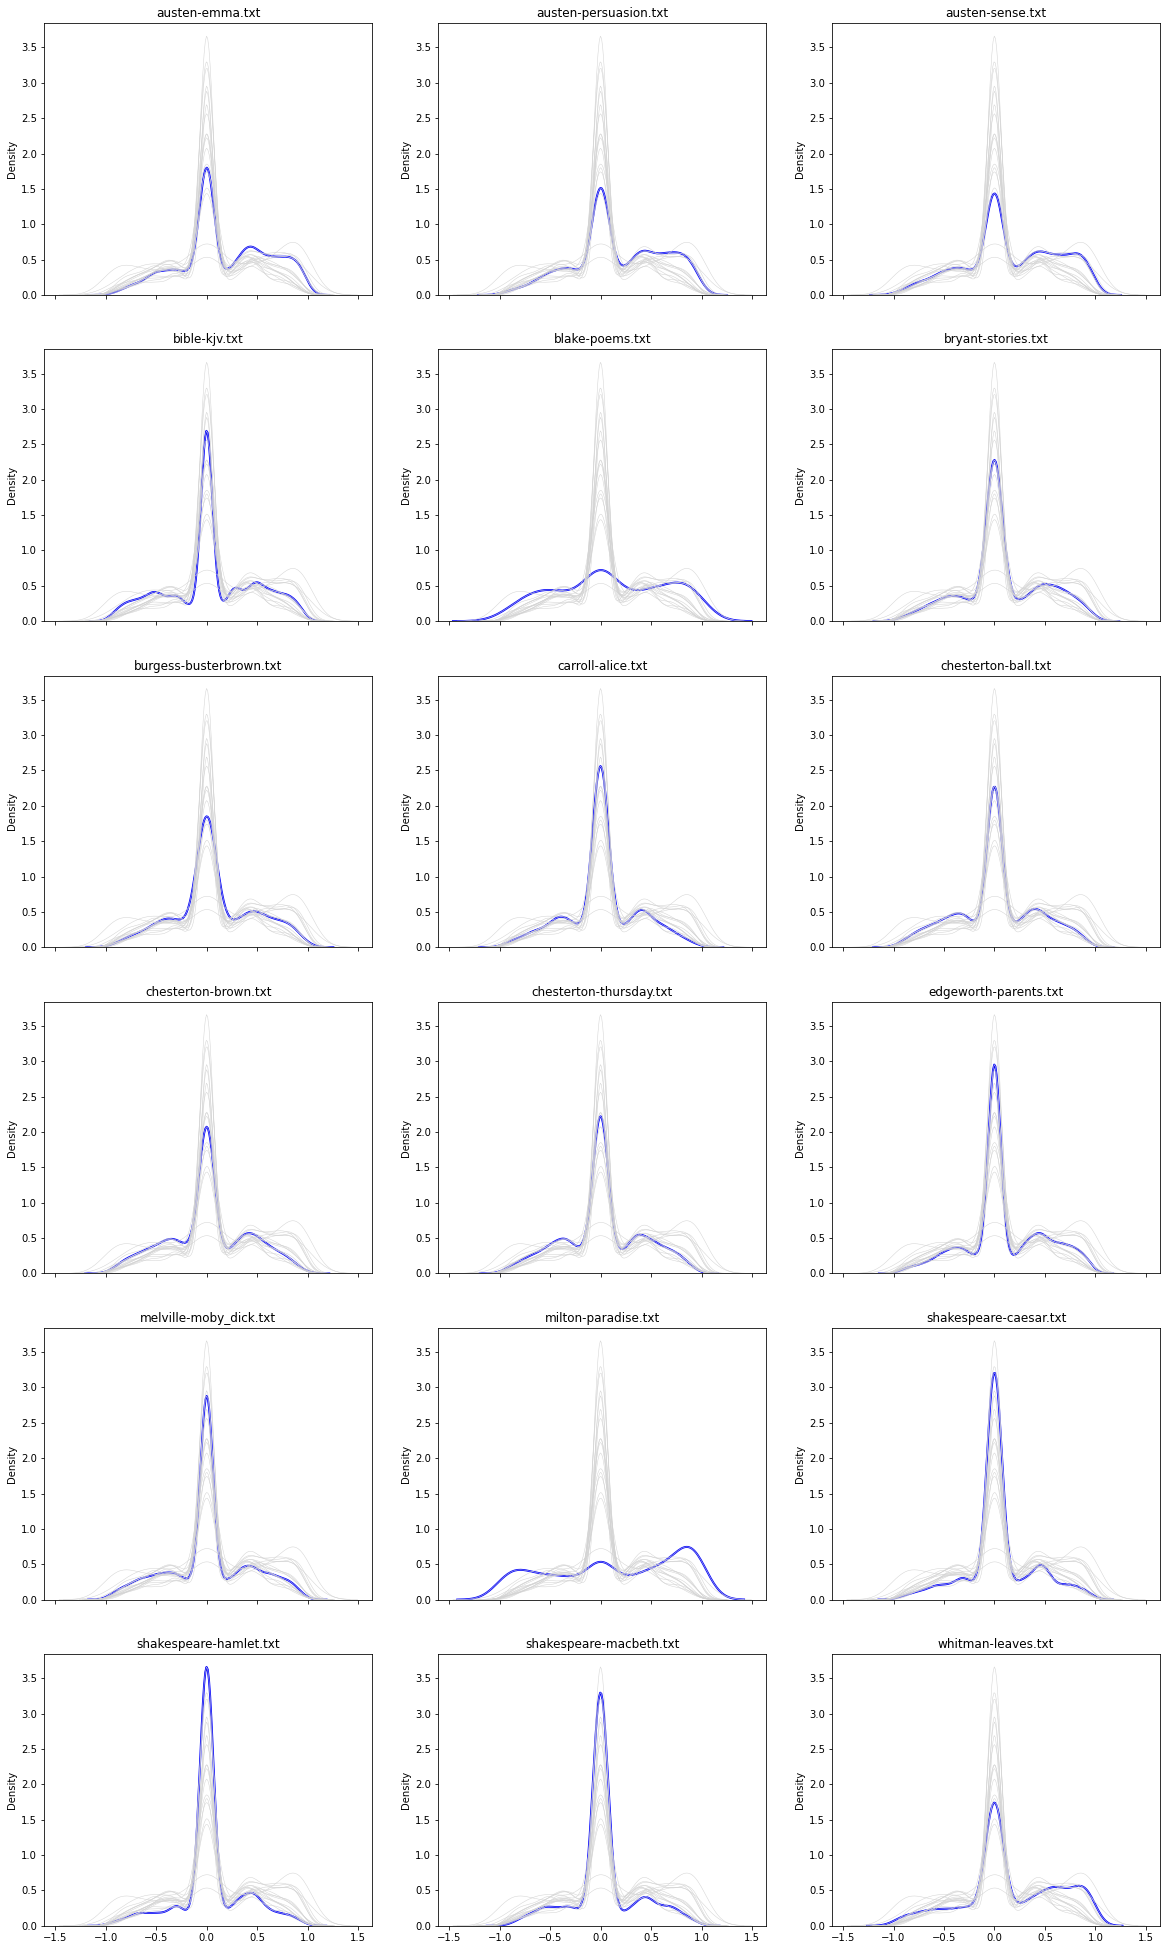

In [29]:
fig, axes = plt.subplots((len(gutenberg)//3), 3, figsize=(20,35), sharex=True)

for f, ax in zip(gutenberg, axes.flat):
    
        
    g = sns.distplot(sentiment_analysis(nltk.corpus.gutenberg.raw(f)),
                hist=False, kde_kws={'shade':False, 'color':'blue', 'alpha':0.4, 'linewidth':2}, ax=ax)
    g.set_title(f)


    for g in gutenberg:
        g = sns.distplot(sentiment_analysis(nltk.corpus.gutenberg.raw(g)),
                    hist=False, kde_kws={'shade':False, 'color':'lightgrey', 'alpha':0.2, 'linewidth':0.5}, ax=ax)     



<AxesSubplot:ylabel='Density'>

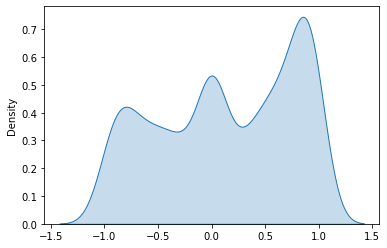

In [30]:
md_sentences = nltk.corpus.gutenberg.sents('carroll-alice.txt')

len(md_sentences)

md_raw = nltk.corpus.gutenberg.raw('milton-paradise.txt')

md_sentences = sent_tokenize(md_raw)



results = []

for t in md_sentences:
    results.append(sia.polarity_scores(t)['compound'])

sns.distplot(results, hist=False, kde_kws={'shade':True})